In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import  TruncatedSVD,LatentDirichletAllocation
import matplotlib.pyplot as plt

In [ ]:
#Affichage des topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        top_features_ind =topic.argsort()[:-no_top_words - 1:-1]
        weights = topic[top_features_ind]
        print(" ".join([feature_names[i] for i in top_features_ind]))

#Affichage des top mots
def plot_top_words(model, feature_names, n_top_words, title,ligne,col):
    fig, axes = plt.subplots(ligne, col, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

Tester les modèles LSA, LDA pour l'extraction de sujets
Ces modèles sont implémentés dans la bibliothèque scikit-learn



***************************LSA
Topic 0:
just don like know people think does good use time
Topic 1:
thanks windows card drive use file mail dos edu files
Topic 2:
god jesus does thanks windows bible know christ christians christian
Topic 3:
key use people government chip encryption clipper keys law public
Topic 4:
know don just does thanks like think anybody windows advance
Topic 5:
edu thanks mail know com information email does address send
Topic 6:
drive thanks car scsi know edu drives hard just people
Topic 7:
edu just don soon windows think like com file cs
Topic 8:
key god just chip use edu keys clipper encryption like
Topic 9:
car like bike new good just thanks window ve cars
***************************LDA
Topic 0:
people gun armenian armenians war turkish states israel said children
Topic 1:
government people law mr use president don think right public
Topic 2:
space program output entry data nasa use science research build
Topic 3:
key car chip used keys bike use bit clipper n

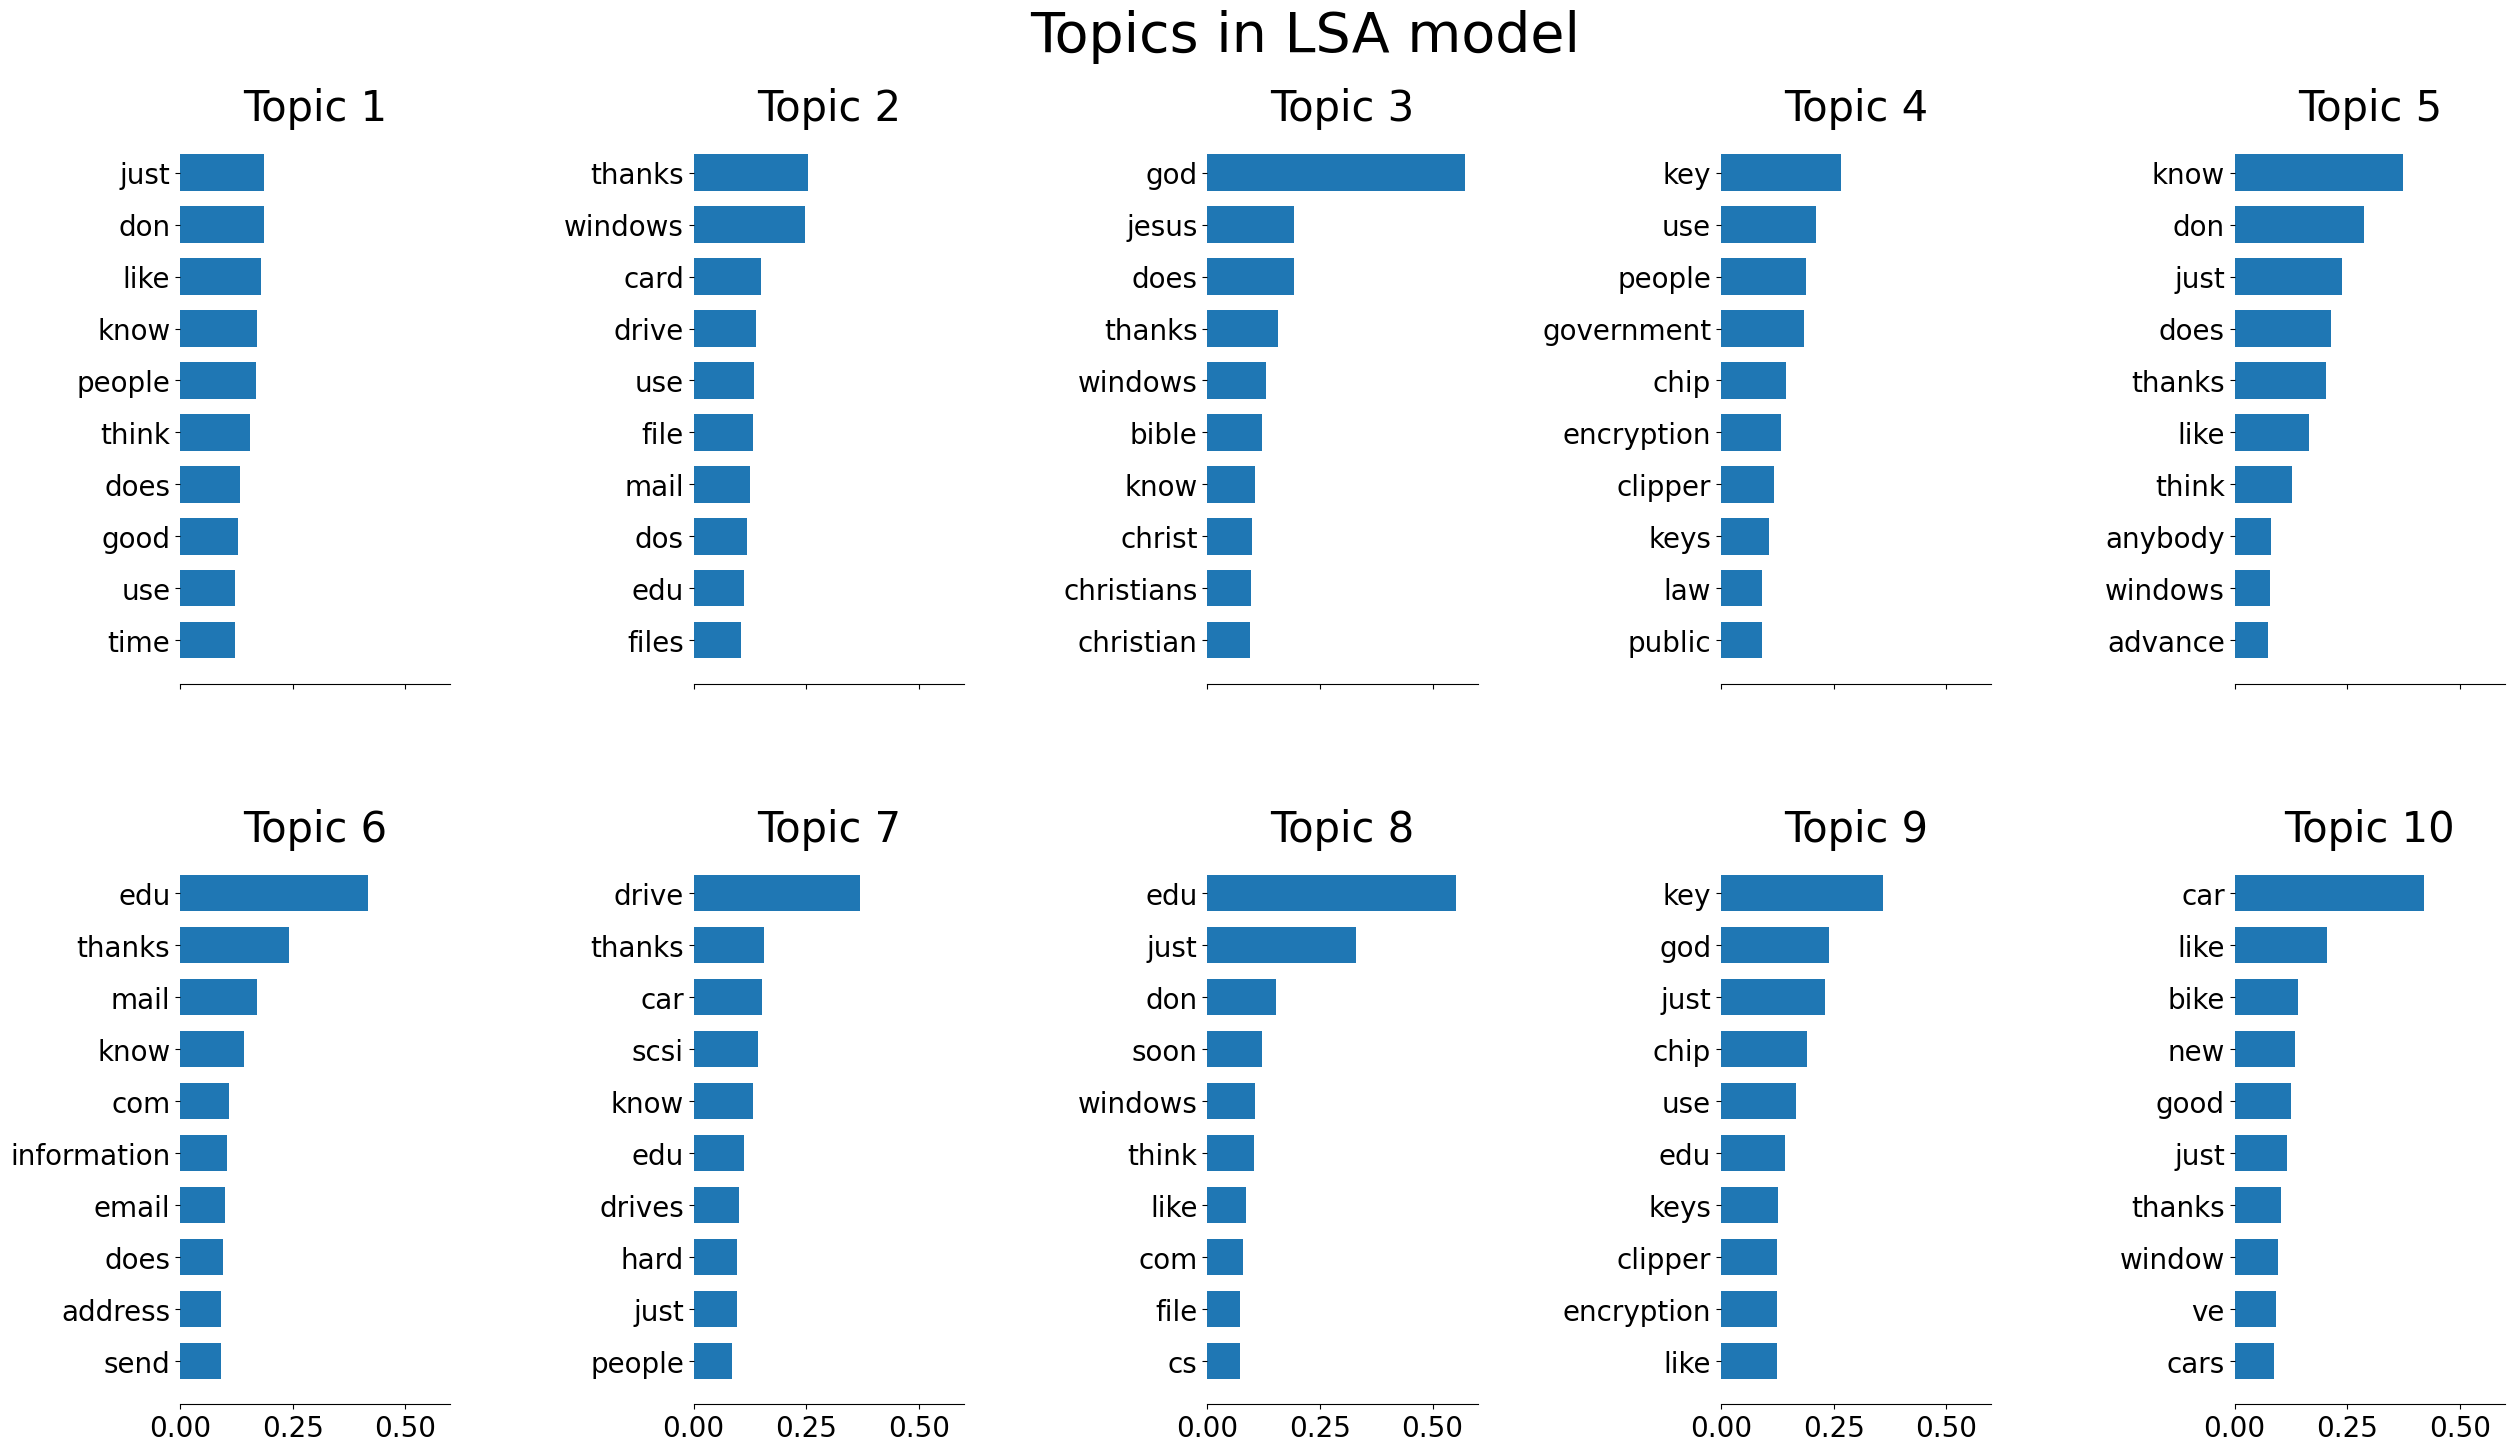

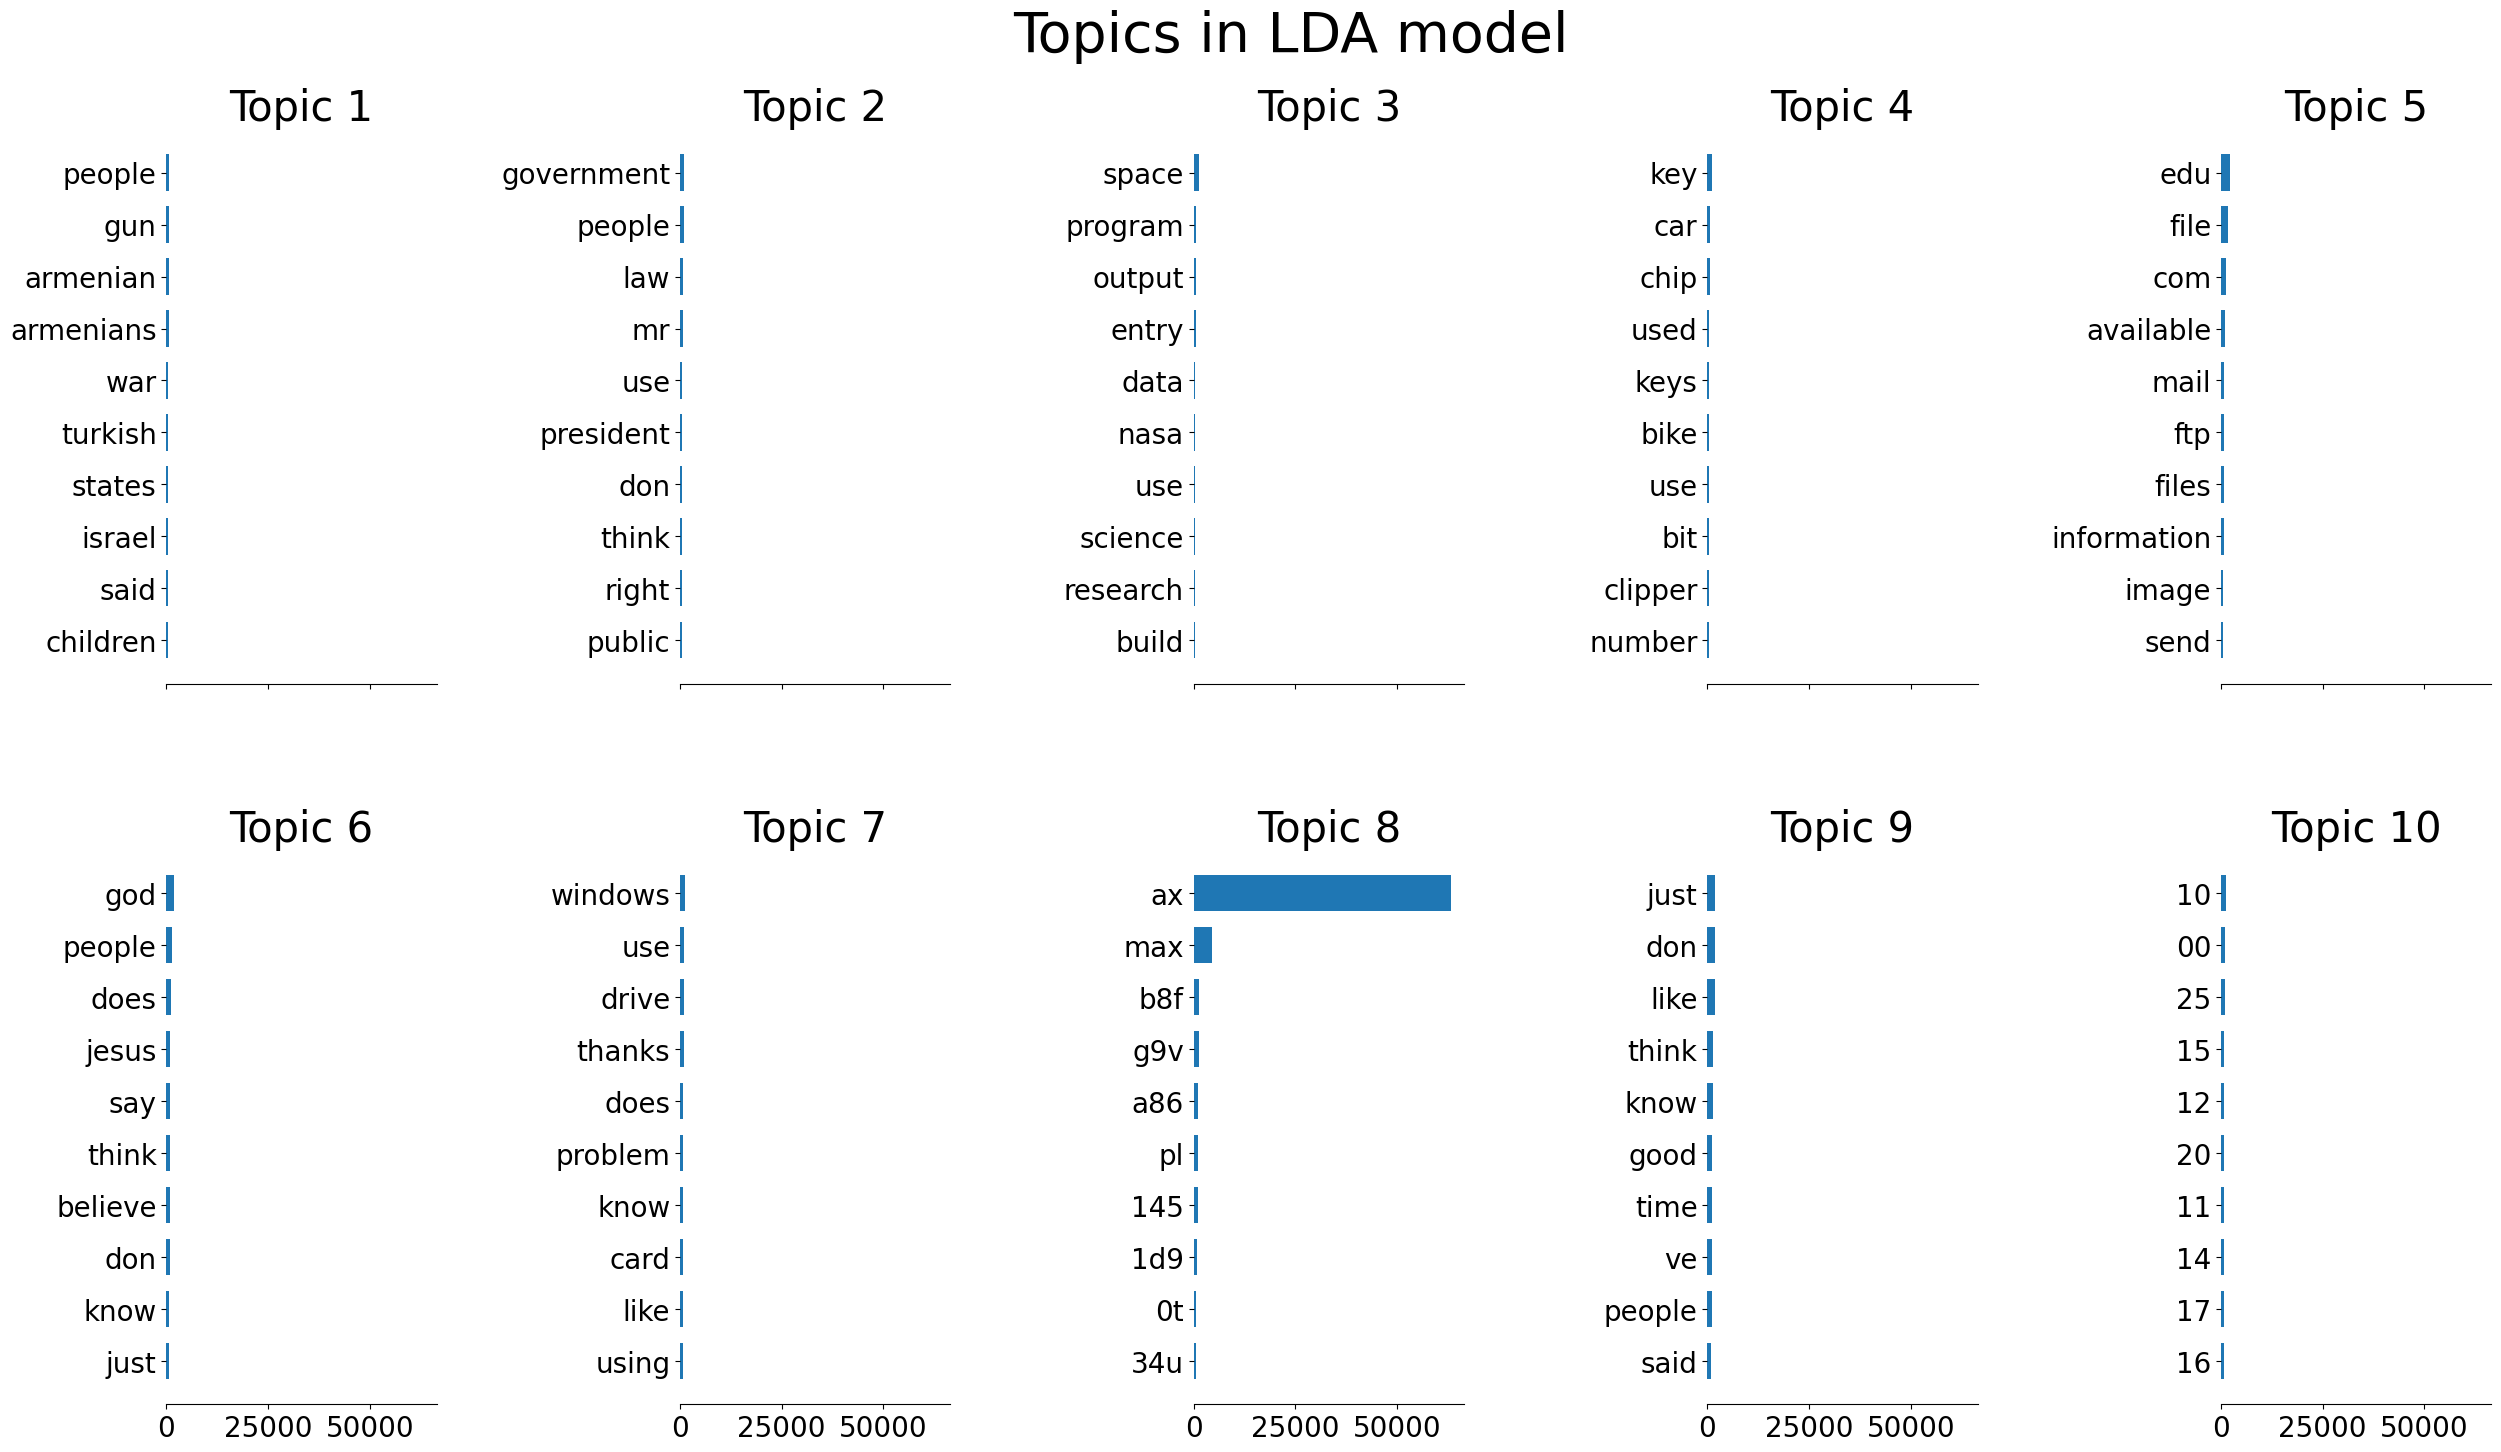

In [ ]:
#Nettoyage de la dataset
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

#nombre de mots maximum des top mots à considerer dans le vocabulaire
no_features = 1000

#Generer les fréquences TFx IDF pour LSA
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

#Generer les fréquences TF pour LDA
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names_out()

#Préciser le nombre de topics comme paramètre d'entrée
nb_topics = 10


#Lancer LSA
#Description de chaque parametre de LSA https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
lsa = TruncatedSVD(n_components=nb_topics, algorithm='randomized', n_iter=10, random_state=42).fit(tfidf)
#Lancer LDA
#Description de chaque paramètre de LDA https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
lda = LatentDirichletAllocation(n_components=nb_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

#Afficher les dix premiers mots les plus pertinents pour chaque topic
nb_top_words = 10

#Affichage sous forme de listes
print("***************************LSA")
display_topics(lsa, tfidf_feature_names, nb_top_words)
print("***************************LDA")
display_topics(lda, tf_feature_names, nb_top_words)

#Affichage graphique
plot_top_words(lsa, tfidf_feature_names, nb_top_words, "Topics in LSA model",2,5)
plot_top_words(lda, tf_feature_names, nb_top_words, "Topics in LDA model",2,5)



**Question 01**: Comparer les résultats d'extraction de sujets avec LSA et LDA en termes de:


1.   Pertinence des sujets extraits
2.   Cohérence des termes decrivant chaque sujet



**Réponse 01:**


**Pertinence**

En termes de pertinence, nous pouvons constater que LDA fournit une bien meilleure pertinence, il est facile d'identifier les sujets à partir de ce que LDA fournit, par exemple pour le sujet 0, nous pouvons identifier un sujet tel que la guerre, ce qui n'est pas le cas de LSA qui fournit une interprétation ambiguë.
Un autre exemple est celui du thème 2, la LDA a donné des mots relatifs à une loi gouvernementale alors que dans la LSA nous trouvons un tas de mots qui n'apportent pas d'informations significatives sur le thème.

**Cohérence**

En termes de cohérence, nous pouvons constater que même si la LDA fournit de meilleurs sujets, les termes en eux-mêmes semblent parfois sans rapport ou incohérents, alors que la LSA, même si elle est
moins interprétable, semble avoir des mots plus cohérents, par exemple pour le sujet 0. Pour la LDA, nous avons des mots exprimant des pays, des mots exprimant la guerre et ils semblent ne pas être cohérents sans nécessiter un certain effort cognitif,
alors que dans la lsa, nous avons des mots qui peuvent facilement exprimer une relation.

In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 30.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.0 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039175 sha256=ee5dc0ca0c5015e6c29269c8cb23af529dc00c0a7b952c98400c3b6196534e09
  Stored in di

**Tester le modèle BERTopic**

**Référence** : Grootendorst, M. (2022). BERTopic: Neural topic modeling with a class-based TF-IDF procedure. arXiv preprint arXiv:2203.05794.

**Lien GitHub** https://github.com/maartengr/bertopic

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

topic_model = BERTopic()
#obtenir les sujets et leurs probabilités en appliquant le modèle BERTopic
topics, probs = topic_model.fit_transform(docs)

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
#Afficher les informations sur les topics
topic_model.get_topic_info()
topic_model.get_topic(0)
topic_model.get_document_info(docs)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,\n\nI am sure some bashers of Pens fans are pr...,0,0_game_team_games_he,"[game, team, games, he, players, season, hocke...",[The FLYERS team that can beat any team on any...,game - team - games - he - players - season - ...,1.000000,False
1,My brother is in the market for a high-perform...,5,5_monitor_card_video_drivers,"[monitor, card, video, drivers, vga, screen, m...",[Hello all.\n\tI am thinking about buying an e...,monitor - card - video - drivers - vga - scree...,1.000000,False
2,\n\n\n\n\tFinally you said what you dream abou...,44,44_were_armenians_they_azerbaijan,"[were, armenians, they, azerbaijan, her, was, ...",[Accounts of Anti-Armenian Human Right Violati...,were - armenians - they - azerbaijan - her - w...,0.360963,False
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,33,33_scsi_scsi2_scsi1_ide,"[scsi, scsi2, scsi1, ide, controller, drive, a...",[The above does not tell the proper story of S...,scsi - scsi2 - scsi1 - ide - controller - driv...,0.586809,False
4,1) I have an old Jasmine drive which I cann...,81,81_tape_backup_tapes_drive,"[tape, backup, tapes, drive, device, munroe, w...",[hello all- i have a problem with my micro sol...,tape - backup - tapes - drive - device - munro...,0.521391,False
...,...,...,...,...,...,...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,-1,-1_to_the_is_of,"[to, the, is, of, and, for, it, in, you, that]",[THE WHITE HOUSE\n\n Office o...,to - the - is - of - and - for - it - in - you...,0.000000,False
18842,\nNot in isolated ground recepticles (usually ...,169,169_ground_grounding_conductor_neutral,"[ground, grounding, conductor, neutral, wire, ...","[\nNot according to the NEC nor the CEC, as ex...",ground - grounding - conductor - neutral - wir...,0.681298,False
18843,I just installed a DX2-66 CPU in a clone mothe...,85,85_fan_cpu_heat_sink,"[fan, cpu, heat, sink, fans, cooling, chip, ho...","[N(P>Just got a 66MHz 486DX2 system, and am co...",fan - cpu - heat - sink - fans - cooling - chi...,1.000000,False
18844,\nWouldn't this require a hyper-sphere. In 3-...,150,150_den_sphere_radius_ellipse,"[den, sphere, radius, ellipse, plane, points, ...","[\nHere is one by Andrew ""Graphics Gems"" Glass...",den - sphere - radius - ellipse - plane - poin...,1.000000,False


**Question 02:** En utilisant les méthodes implémentées dans le modele BERTopic, comparer les sujets extraits par ce modèle avec les précédents sujets obtenus avec LSA et LDA en termes de :


1.Nombre de sujets

2.Cohérence des sujets   

3.Diversification des sujets

4.D'autres critères pertinents à proposer



1)il y a des sujets indexés de -1 à 169, ce qui signifie que 171 sujets ont été attribués par rapport aux 10 sujets attribués dans lsa et lda
Bertopic semble fournir une meilleure cohérence que lda et similaire à lsa.

2)Bertopic semble être riche en sujets et en types,

3)on peut dire que Bertopic fournit des sujets beaucoup plus diversifiés que lda et lsa.

4)
-Bertopic fournit des représentations beaucoup plus faciles à interpréter que lsa et lda.

-Bertopic offre une bonne interprétabilité par rapport à lsa, mais pas mieux que lda.

-BERTopic utilise des encastrements BERT pré-entraînés, qui sont des encastrements contextuels capturant la sémantique des mots dans leur contexte.

**Réponse 02:**



**Question 03:** Tester le pipeline LDA en utilisant la bibliothèque GenSim au lieu de SKLearn. A noter qu'il existe d'autres datasets à explorer sur cette bibliothèque

Lien tutoriel: https://markroxor.github.io/gensim/static/notebooks/topic_coherence_tutorial.html

In [ ]:
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis.gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

# Sample texts
texts = [
    ['human', 'interface', 'computer'],
    ['survey', 'user', 'computer', 'system', 'response', 'time'],
    ['eps', 'user', 'interface', 'system'],
    ['system', 'human', 'system', 'eps'],
    ['user', 'response', 'time'],
    ['trees'],
    ['graph', 'trees'],
    ['graph', 'minors', 'trees'],
    ['graph', 'minors', 'survey']
]

# Create a Dictionary
dictionary = Dictionary(texts)

# Create a corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Build two LDA models with increased iterations
good_lda_model = LdaModel(corpus=corpus, id2word=dictionary, iterations=100, num_topics=2)
bad_lda_model = LdaModel(corpus=corpus, id2word=dictionary, iterations=50, num_topics=2)

# Evaluate coherence using u_mass
good_cm = CoherenceModel(model=good_lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
bad_cm = CoherenceModel(model=bad_lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')

#View the pipeline parameters for one coherence model
print("goodcm : ",good_cm)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


goodcm :  Coherence_Measure(seg=<function s_one_pre at 0x78e127a34430>, prob=<function p_boolean_document at 0x78e127a34700>, conf=<function log_conditional_probability at 0x78e1276ed510>, aggr=<function arithmetic_mean at 0x78e1276ede10>)


In [ ]:
vis = pyLDAvis.gensim.prepare(good_lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Visualize the goodLdaModel
good_vis_data = pyLDAvis.gensim.prepare(good_lda_model, corpus, dictionary)

# Visualize the badLdaModel
bad_vis_data = pyLDAvis.gensim.prepare(bad_lda_model, corpus, dictionary)

# Display the visualizations side by side or in different cells
pyLDAvis.display(good_vis_data)
pyLDAvis.display(bad_vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get coherence scores
good_coherence = good_cm.get_coherence()
bad_coherence = bad_cm.get_coherence()

print("Good LDA Model Coherence:", good_coherence)
print("Bad LDA Model Coherence:", bad_coherence)

Good LDA Model Coherence: -14.707630876150118
Bad LDA Model Coherence: -14.667698706412192


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
